# Отслеживане цели

## Постановка задачи
Рассмотрим задачу отслеживания цели, планарный маневр которой описывается непрерывно-дискретной стохастической системой наблюдения вида:
$$ \begin{cases} 
dX(t) = a_t(X(t))dt + b_t dW(t), \ t > 0, \ X(0)=X_0 \sim   \pi_0(x) \\
Y_k = A_k(X(t_k)) + B_k V_k, \ k \in \mathbb{N} \\
\end{cases} $$

Динамика системы описывается вектором $x(t) = (x_t^1,x_t^2,x_t^3,x_t^4,x_t^5)$, где $x_t^1$, $x_t^2 ~-$ декартовы координаты цели, $x_t^3 ~-$ путевая скорость (скорость относительно земной поверхности), $x_t^4 ~-$ путевой угол, $x_t^5 ~-$ нормальное ускорение.

$$ \begin{cases} 
x_t^1 = x_0^1 + \int\limits_0^t x_s^3 \cos x_s^4 ds \\
x_t^2 = x_0^2 + \int\limits_0^t x_s^3 \sin x_s^4 ds \\
x_t^3 = x_0^3 \\
x_t^4 = x_0^4 + \int\limits_0^t \frac{x_s^5}{x_s^3} ds \\
x_t^5 = x_0^5 - \lambda \int\limits_0^t x_s^5 ds + \nu t + \mu w_t \\
\end{cases} $$

$$ x_0^1 \sim \mathcal{N}(m_0^1,\sigma_0^1), \ x_0^2 \sim \mathcal{N}(m_0^2,\sigma_0^2), \ x_0^3 \sim {\cal U}[V_{min},V_{max}], \ x_0^4 \sim \mathcal{N}(m_0^4,\sigma_0^4), \ x_0^5 = \frac{\nu}{\lambda}   $$

Наблюдения системы описываются вектором $y(t) = (r_t^1,\phi_t^1,r_t^2,\phi_t^2)$, где $(r_t^1,\phi_t^1)$, $(r_t^2,\phi_t^2) ~-$ полярные координаты цели, соответствующие двум радарам, находящимся в точках $o_1=(o_1^{'},o_1^{''}),\ o_2=(o_2^{'},o_2^{''})$.

$$ \begin{cases}
r_t^1 = \sqrt{(x_t^1 - o_1^{'})^2 + (x_t^2 - o_1^{''})^2} + \varepsilon_1^r \\
\phi_t^1 = atan2(x_t^2-o_1^{''}, x_t^1-o_1^{'}) + \varepsilon_1^\phi \\
r_t^2 = \sqrt{(x_t^1 - o_2^{'})^2 + (x_t^2 - o_2^{''})^2} + \varepsilon_2^r \\
\phi_t^2 = atan2(x_t^2-o_2^{''}, x_t^1-o_2^{'}) + \varepsilon_2^\phi \\
\end{cases} $$

$$ \varepsilon_i^r \sim \mathcal{N}(0,\sigma_r),\ \varepsilon_i^\phi \sim \mathcal{N}(0,\sigma_\phi),\ i=\overline{1,2} $$

$B_k = diag(\sigma_r,\sigma_\phi,\sigma_r,\sigma_\phi)$, $V_k ~-$ последовательность независимых стандартных гауссовских векторов. 

Параметры системы:
- $m_0^1 = 0\ [м],\ \sigma_0^1 = 2 \cdot 10^3\ [м]$;
- $m_0^2 = 2.5\cdot 10^4\ [м],\ \sigma_0^2 = 2 \cdot 10^3\ [м]$;
- $V_{min} = 200\ [м/c],\ V_{max} = 600\ [м/c]$;
- $m_0^4 = 10\ [град],\ \sigma_0^4 = 15\ [град]$;
- $\lambda=0.05,\ \mu=1.0,\ \nu=0.5 $, значение $x_0^5 = \frac{\nu}{\lambda}$ следует из стационарности процесса $x_t^5$;
- $w_t ~-$ стандартный винеровский процесс;
- $\sigma_r = 50\ [м], \ \sigma_\phi=0.1 \ [град] $;
- $o_1 = (0,0)\ [м] ,\ o_2 = (-10^4,10^4)\ [м]$.

Маневр длится $T=150\ [с]$, оба радара работают с частотой $1\ [Гц] $.

Состояния системы дискретизуем методом Эйлера-Маруямы с шагом $h=0.01 \ [с]$.
$$ x_n =
\begin{pmatrix}
    x_n^1 \\
    x_n^2 \\
    x_n^3 \\
    x_n^4 \\
    x_n^5 \\
\end{pmatrix} =
\begin{pmatrix}
    x_{n-1}^1 \\
    x_{n-1}^2 \\
    x_{n-1}^3 \\
    x_{n-1}^4 \\
    x_{n-1}^5 \\
\end{pmatrix} +
\begin{pmatrix}
  x_{n-1}^3 \cos x_{n-1}^4 \\
  x_{n-1}^3 \sin x_{n-1}^4 \\
  0 \\
  \frac{x_{n-1}^5}{x_{n-1}^3} \\
  -\lambda x_{n-1}^5 + \nu
\end{pmatrix} h + b_t 
\begin{pmatrix}
    0\\
    0\\
    0\\
    0\\
    w
\end{pmatrix}
$$
где $b_t = diag(0,0,0,0,\mu \sqrt{h})$, $w \sim \mathcal{N}(0,1)$.

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import factorial
from scipy import integrate

In [2]:
# Параметры системы
m_1 = 0       # м
sig_1 = 2*1e3 # м
m_2 = 2.5*1e4 # м
sig_2 = 2*1e3 # м
V_min = 200   # м/с
V_max = 600   # м/с
m_4 = 10    # градус
sig_4 = 15  # градус
lam = 0.05
mu = 1
nu = 0.5
T = 150       # с
state_step = 0.01

o_1 = [0,0] # м
o_2 = [-1e4, 1e4] # м
sig_r = 50 # м
sig_phi = 0.1 # градус
freq = 1 # Гц
obs_step = 1/freq # с
k = int(obs_step/state_step)

In [3]:
# Генерация начальных состояний
def initial_values(k=1):
    return np.stack([np.random.normal(loc=m_1, scale=sig_1, size=k),
                    np.random.normal(loc=m_2, scale=sig_2, size=k),
                    np.random.uniform(low=V_min, high=V_max, size=k),
                    np.random.normal(loc=m_4, scale=sig_4, size=k),
                    np.repeat(nu/lam, k)], axis=1)
# Градусы в радианы
def grad_to_rad(x):
    return np.multiply(x, np.pi)/180
# Радианы в градусы
def rad_to_grad(x):
    return np.divide(x*180,np.pi)

def r(x,o,eps):
    if(len(x.shape) > 1):
        return np.sqrt((x[:,0]-o[0])**2 + (x[:,1]-o[1])**2) + eps
    return np.sqrt((x[0]-o[0])**2 + (x[1]-o[1])**2) + eps

def phi(x,o,eps):
    if(len(x.shape) > 1):
        return rad_to_grad(np.arctan2(x[:,1]-o[1],x[:,0]-o[0])) + eps
    return rad_to_grad(np.arctan2(x[1]-o[1],x[0]-o[0])) + eps

In [4]:
def at(x):
    if(len(x.shape) > 1):
        return np.array([x[:,2]*np.cos(grad_to_rad(x[:,3])), 
                         x[:,2]*np.sin(grad_to_rad(x[:,3])), 
                         np.zeros(x.shape[0]), 
                         rad_to_grad(x[:,4]/x[:,2]), 
                         -lam*x[:,4]+nu]).T
    return np.array([x[2]*np.cos(grad_to_rad(x[3])), 
                     x[2]*np.sin(grad_to_rad(x[3])), 
                     0, 
                     rad_to_grad(x[4]/x[2]), 
                     -lam*x[4]+nu])
bt = np.diag([0,0,0,0,mu*np.sqrt(state_step)])
def euler_maruyama_step(x):
    if(len(x.shape) > 1):
        zs = np.zeros(x.shape[0])
        return x + at(x)*state_step + np.array([zs, zs, zs, zs, np.random.normal(loc=0, scale=1, size=x.shape[0])*mu*np.sqrt(state_step)]).T
    return x + at(x)*state_step + [0, 0, 0, 0, np.random.normal(loc=0, scale=1, size=1)[0]*mu*np.sqrt(state_step)]
def ct(x,w):
    return np.array([r(x[0:2], o_1, w[0]),
                    phi(x[0:2], o_1, w[1]),
                    r(x[0:2], o_2, w[2]),
                    phi(x[0:2], o_2, w[3])])
def Ct(x):
    if(len(x.shape) > 1):
        sz = x.shape[0]
        w = np.vstack([np.random.normal(loc=0, scale=sig_r, size=sz), 
                      np.random.normal(loc=0, scale=sig_phi, size=sz),
                      np.random.normal(loc=0, scale=sig_r, size=sz),
                      np.random.normal(loc=0, scale=sig_phi, size=sz)])
        return np.array([r(x[:,0:2], o_1, w[0,:]),
                        phi(x[:,0:2], o_1, w[1,:]),
                        r(x[:,0:2], o_2, w[2,:]),
                        phi(x[:,0:2], o_2, w[3,:])]).T
    w = np.concatenate([np.random.normal(loc=0, scale=sig_r, size=2), np.random.normal(loc=0, scale=sig_phi, size=2)])
    return np.array([r(x[0:2], o_1, w[0]),
                    phi(x[0:2], o_1, w[2]),
                    r(x[0:2], o_2, w[1]),
                    phi(x[0:2], o_2, w[3])])
def h(x): # y=h(x)+w 
    if(len(x.shape) > 1):
        zs = np.zeros(x.shape[0])
        return np.array([r(x[:,0:2], o_1, zs),
                        phi(x[:,0:2], o_1, zs),
                        r(x[:,0:2], o_2, zs),
                        phi(x[:,0:2], o_2, zs)]).T
    return np.array([r(x[0:2], o_1, 0),
                    phi(x[0:2], o_1, 0),
                    r(x[0:2], o_2, 0),
                    phi(x[0:2], o_2, 0)])

In [5]:
def gen_sys():
    state = pd.DataFrame(data = None, index = np.arange(start=0, stop=T+state_step, step=state_step), columns = np.array(['x1','x2','x3','x4','x5']))
    obs = pd.DataFrame(data = None, index = np.arange(start=0, stop=T+obs_step, step=obs_step), columns = np.array(['r1','phi1','r2','phi2']))
    Vt = pd.DataFrame({'V': np.random.normal(loc=0, scale=1, size=state.shape[0]-1)}, index = state.index[1:])
    Wt = pd.DataFrame({'Eps_r1': np.random.normal(loc=0, scale=sig_r, size=obs.shape[0]),
                      'Eps_phi1': np.random.normal(loc=0, scale=sig_phi, size=obs.shape[0]),
                      'Eps_r2': np.random.normal(loc=0, scale=sig_r, size=obs.shape[0]),
                      'Eps_phi2': np.random.normal(loc=0, scale=sig_phi, size=obs.shape[0])},
                      index = obs.index)
    state_time = state.index
    state.loc[0.00,:] = initial_values()
    obs.loc[0.00,:] = ct(state.loc[0.00], Wt.loc[0.00])
    for i in range(1,len(state.index)):
        t = state_time[i]
        t_prev = state_time[i-1]
        state.loc[t] = state.loc[t_prev] + at(state.loc[t_prev])*state_step + [0,0,0,0,Vt.loc[t,'V']*mu*np.sqrt(state_step)]
        if i % k == 0:
            obs.loc[t] = ct(state.loc[t], Wt.loc[t])
    return state, obs
np.random.seed(1)
state, obs = gen_sys()
state_time = state.index
obs_time = obs.index

In [6]:
def gen_trivial(state_time):
    dt = state_time[1] - state_time[0]
    cur_state = np.array([m_1, m_2, (V_max+V_min)/2, m_4, nu/lam])
    est = [cur_state]
    for i in range(1,len(state_time)):
        new_state = cur_state + at(cur_state)*dt
        est.append(new_state)
        cur_state = new_state
    return np.stack(est)    
trivial_est = gen_trivial(state_time)

In [7]:
state

,x1,x2,x3,x4,x5
0.00,649.712435,28055.151805,350.154108,-3.759586,10.0
0.01,653.206441,28054.922209,350.154108,-3.743223,10.162435
0.02,656.700512,28054.69361,350.154108,-3.726595,10.101178
0.03,660.194649,28054.466026,350.154108,-3.710066,10.04831
0.04,663.688852,28054.23945,350.154108,-3.693624,9.940989
...,...,...,...,...,...
149.96,-10110.920525,36570.05169,350.154108,281.497884,12.888962
149.97,-10110.222557,36566.620417,350.154108,281.518974,13.09247
149.98,-10109.523326,36563.189402,350.154108,281.540397,13.022345
149.99,-10108.822812,36559.758648,350.154108,281.561706,13.109855


In [8]:
obs

,r1,phi1,r2,phi2
0.0,28105.205689,88.589238,20946.909604,59.433348
1.0,28000.182937,87.986372,21151.821449,58.639562
2.0,28104.769683,87.267252,21280.63889,57.664748
3.0,28158.470005,86.469805,21451.375854,57.082951
4.0,28071.306296,85.888233,21733.220751,56.289003
...,...,...,...,...
146.0,39271.295647,105.162283,27997.16257,90.6604
147.0,39010.690187,105.249655,27544.858717,90.515683
148.0,38619.718139,105.200137,27282.17501,90.498748
149.0,38310.303705,105.220047,26880.654123,90.373192


## Conditionally-Minimax Nonlinear Filtering

Объём синтетических выборок для CMNF $N=1000$.

In [9]:
N = int(1000) # объём выборки
n = 5 # размерность пространсва состояний
euler_step = state_step/10 # шаг для численного решения ДУ и СДУ

def cmnf_initial_condition(N,n):
    X_synth_state = initial_values(N)
    X_hat = np.mean(X_synth_state, axis=0)
    K = (1/(N-n))*np.sum((X_synth_state - X_hat)[..., None] @ (X_synth_state - X_hat)[:, None], axis = 0)
    return X_hat, K, X_synth_state, np.repeat(X_hat[None, :], N, axis = 0)

In [10]:
def base_prediction(x, dt):
    for i in range(int(state_step/dt)):
        x = x + at(x)*dt
    return x

def base_correction(x,y,dt):
    return y - h(base_prediction(x,dt))

def euler_maruyama(x,dt):
    zs = np.zeros(x.shape[0])
    for i in range(int(state_step/dt)):
        x = x + at(x)*dt + np.array([zs, zs, zs, zs, np.random.normal(loc=0, scale=1, size=x.shape[0])*mu*np.sqrt(dt)]).T
    return x

def cmnf_prediction_correction(X_hat_prev, X_synth_state_prev, X_synth_est_prev, h, Y):
    # CMNF prediction 
    Alpha_target_base_pred = base_prediction(X_hat_prev, h)
    
    X_synth_state = euler_maruyama_step(X_synth_state_prev)
    Y_synth_obs = Ct(X_synth_state) 

    Alpha_synth_base_pred = base_prediction(X_synth_est_prev, h)
    Gamma_synth_base_corr = base_correction(X_synth_est_prev, Y_synth_obs, h)

    Synth_objects = np.concatenate([X_synth_state, Alpha_synth_base_pred, Gamma_synth_base_corr], axis=1)
    x_dim, a_dim, g_dim = X_synth_state.shape[1], Alpha_synth_base_pred.shape[1], Gamma_synth_base_corr.shape[1]
    
    m = np.mean(Synth_objects, axis=0)
    R = np.mean((Synth_objects - m)[..., None] @ (Synth_objects - m)[:, None], axis = 0)

    R_xa, R_aa_pinv, R_ga = R[:x_dim,x_dim:x_dim+a_dim], np.linalg.pinv(R[x_dim:x_dim+a_dim,x_dim:x_dim+a_dim]), R[-g_dim:,x_dim:x_dim+a_dim]
    X_target_modif_pred = R_xa @ R_aa_pinv @ Alpha_target_base_pred + (m[:x_dim] - R_xa @ R_aa_pinv @ m[x_dim:x_dim+a_dim])
    
    K_xx = R[:x_dim,:x_dim] - R_xa @ R_aa_pinv @ R[x_dim:x_dim+a_dim,:x_dim]
    K_xg = R[:x_dim,-g_dim:] - R_xa @ R_aa_pinv @ R[x_dim:x_dim+a_dim,-g_dim:]
    K_gg_pinv = np.linalg.pinv(R[-g_dim:,-g_dim:] - R_ga @ R_aa_pinv @ R[x_dim:x_dim+a_dim,-g_dim:])
    
    X_synth_modif_pred = (R_xa @ R_aa_pinv @ Alpha_synth_base_pred[..., None]).squeeze() + (m[:x_dim] - R_xa @ R_aa_pinv @ m[x_dim:x_dim+a_dim])
    Gamma_synth_modif_corr = Gamma_synth_base_corr - m[-g_dim:] - R_ga @ R_aa_pinv @ (Alpha_target_base_pred - m[x_dim:x_dim+a_dim])
    X_synth_est = X_synth_modif_pred
    if Y is None:
        return X_target_modif_pred, K_xx, X_synth_state, X_synth_est
    # CMNF correction
    X_synth_est = X_synth_modif_pred + (K_xg @ K_gg_pinv @ Gamma_synth_modif_corr[..., None]).squeeze() 
    Gamma_target_base_corr = base_correction(X_hat_prev, Y, h) 
    Gamma_target_modif_corr = Gamma_target_base_corr - m[-g_dim:] - R_ga @ R_aa_pinv @ (Alpha_target_base_pred - m[x_dim:x_dim+a_dim])
    
    K_xx = R[:x_dim,:x_dim] - R_xa @ R_aa_pinv @ R[x_dim:x_dim+a_dim,:x_dim]
    K_gx = R[-g_dim:,:x_dim] - R_ga @ R_aa_pinv @ R[x_dim:x_dim+a_dim,:x_dim]
    
    X_hat = np.array(X_target_modif_pred + K_xg @ K_gg_pinv @ Gamma_target_modif_corr, dtype=np.float64)
    K_hat = K_xx - K_xg @ K_gg_pinv @ K_gx
    
    return X_hat, K_hat, X_synth_state, X_synth_est

In [11]:
def run_cmnf(Y, N, n, state_time, obs_time, h = euler_step):
    cur_X, K0, cur_X_synth_state, cur_X_synth_est = cmnf_initial_condition(N,n)
    X_est, K_est = [cur_X], [K0]
    for i in range(1,len(state_time)):
        if(state_time[i] in obs_time):
            cur_obs = Y[int(state_time[i])]
        else: 
            cur_obs = None
        cur_X, K, cur_X_synth_state, cur_X_synth_est = cmnf_prediction_correction(cur_X, 
                                                                                  cur_X_synth_state, 
                                                                                  cur_X_synth_est, 
                                                                                  h,
                                                                                  Y = cur_obs)
        X_est.append(cur_X)
        K_est.append(K)
    return np.stack(X_est), np.stack(K_est)

In [12]:
X_cmnf, K_cmnf = run_cmnf(np.array(obs), N, n, state_time, obs_time)

## Square-Root Cubature Kalman Filter

**Расчёт сигма-точек и весов для CKF**

Сигма-точки $ x_i, \ i=\overline{1,n} $ - корни полинома Гаусса-Эрмита $H_n(x)$:
$$ H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n}e^{-x^2} $$
$$ w_i = \frac{2^{n-1} n! \sqrt{\pi}}{n^2 (H_{n-1}(x_i))^2 } $$ 
Выберем трехточечную схему. Тогда сигма-точки - это корни полинома Гаусса-Эрмита $H_3(x)=8x^3 - 12x $, а для подсчета весов будет использован полином Гаусса-Эрмита $H_2(x)=4x^2-2$.

In [13]:
def H2(x):
    return 4*x**2 - 2
n_gh = 3
roots = np.roots([8,0,-12,0])
weights = np.array([2**(n_gh-1)*factorial(n_gh)*np.sqrt(np.pi)/( n_gh**2 * H2(x)**2 ) for x in roots])
roots, weights

(array([-1.22474487,  1.22474487,  0.        ]),
 array([0.29540898, 0.29540898, 1.1816359 ]))

In [14]:
sigma_points, sigma_weights = [], []
idx = itertools.product(np.arange(3), repeat=5)
for i in idx:
    sigma_points.append(roots[list(i)])
    sigma_weights.append(np.prod(weights[list(i)]))
sigma_points = np.stack(sigma_points)
sigma_weights = np.array(sigma_weights)
sigma_weights = sigma_weights/np.sum(sigma_weights)    
m = sigma_points.shape[0]
m

243

In [16]:
def get_L(a): # нижнетреугольная матрица из треугольного разложения
    q, r = np.linalg.qr(a.T)
    return r.T

In [15]:
# Корни из матриц ковариаций шумов в состояниях и наблюдениях
S_Q = np.diag([0, 0, 0, 0, np.sqrt(state_step)*mu])
S_R = np.diag([sig_r, sig_phi, sig_r, sig_phi])

In [17]:
def ckf_prediction_correction(X_prev, S_prev, Y):
    # SR-CKF prediction
    Gamma_prev = (S_prev @ sigma_points[...,None]).squeeze() + X_prev
    Gamma_star_prev = euler_maruyama_step(Gamma_prev)
    X_pred = Gamma_star_prev.T @ sigma_weights
    Chi_star_pred = 1/np.sqrt(m) * (Gamma_star_prev - X_pred).T
    S_pred = get_L(np.hstack((Chi_star_pred, S_Q)))
    if Y is None:
        return np.array(X_pred, dtype = np.float64), S_pred
    # SR-CKF correction
    Gamma_pred = (S_pred @ sigma_points[...,None]).squeeze() + X_pred
    Y_pred = Ct(Gamma_pred)
    Z_pred = Y_pred.T @ sigma_weights
    C_pred = 1/np.sqrt(m) * (Y_pred - Z_pred).T
    S_zz_pred = get_L(np.hstack((C_pred, S_R)))
    Chi_pred = 1/np.sqrt(m) * (Gamma_pred - X_pred).T
    P_xz_pred = Chi_pred @ C_pred.T
    W = (P_xz_pred @ np.linalg.pinv(S_zz_pred.T)) @ np.linalg.pinv(S_zz_pred)
    X_corr = X_pred + W @ (Y - Z_pred) 
    S_corr = get_L(np.hstack((Chi_pred - W @ C_pred, W @ S_R)))
    return np.array(X_corr, dtype = np.float64), S_corr

In [18]:
def run_ckf(Y, state_time, obs_time):
    cur_X = np.array([m_1, m_2, (V_max+V_min)/2, m_4, nu/lam])
    S = np.diag([sig_1, sig_2, np.sqrt((V_max-V_min)**2/12), sig_4, 0])
    X_est, S_est = [cur_X], [S]
    for i in range(1,len(state_time)):
        if(state_time[i] in obs_time):
            cur_obs = Y[int(state_time[i])]
        else: 
            cur_obs = None
        cur_X, S = ckf_prediction_correction(cur_X, S, cur_obs)
        X_est.append(cur_X)
        S_est.append(S)
    return np.stack(X_est), np.stack(S_est)

In [19]:
X_ckf, S_ckf = run_ckf(np.array(obs), state_time, obs_time)

## Результаты оценивания координат состояния

In [48]:
plot_names = ['Декартова координата $x_1$', 
              'Декартова координата $x_2$',
              'Путевая скорость $x_3$', 
              'Путевой угол $x_4$', 
              'Нормальное ускорение $x_5$']
y_labels = ['$x_1$, м', '$x_2$, м', '$x_3$, м/c', '$x_4$, град', '$x_5$, м/$c^2$']
def plot_state(i):
    plt.figure(figsize=[18,12])
    plt.plot(state_time, trivial_est[:,i], label = 'Тривиальная оценка', color = 'green')
    plt.plot(state_time, X_ckf[:,i], label = 'CKF', color = 'red')
    plt.plot(state_time, X_ckf[:,i] + 3*S_ckf[:,i,i], label = '$X_{ckf} \pm 3\sigma$', color = 'red', linestyle = 'dashed')
    plt.plot(state_time, X_ckf[:,i] - 3*S_ckf[:,i,i], color = 'red', linestyle = 'dashed')
    plt.plot(state_time, X_cmnf[:,i], label = 'CMNF', color = 'darkorange')
    plt.plot(state_time, state.iloc[:,i], label = 'Состояние', color = 'blue')
    plt.grid(True)
    plt.title(plot_names[i])
    plt.xlabel('$t$, c')
    plt.ylabel(y_labels[i])
    plt.legend()
    plt.show()

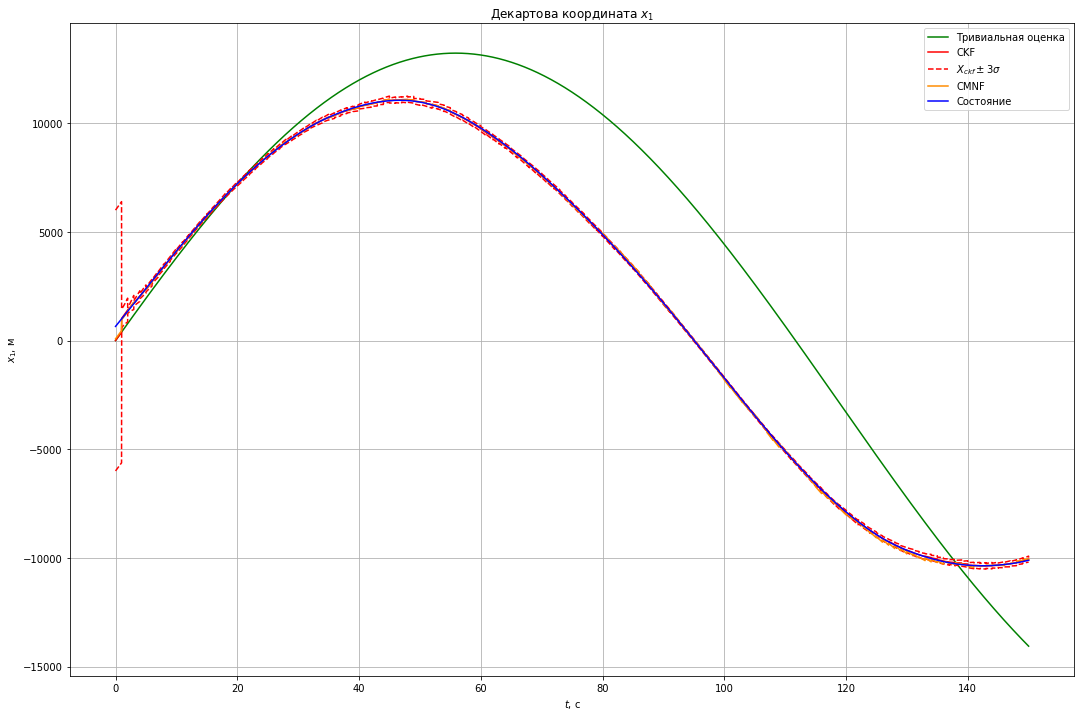

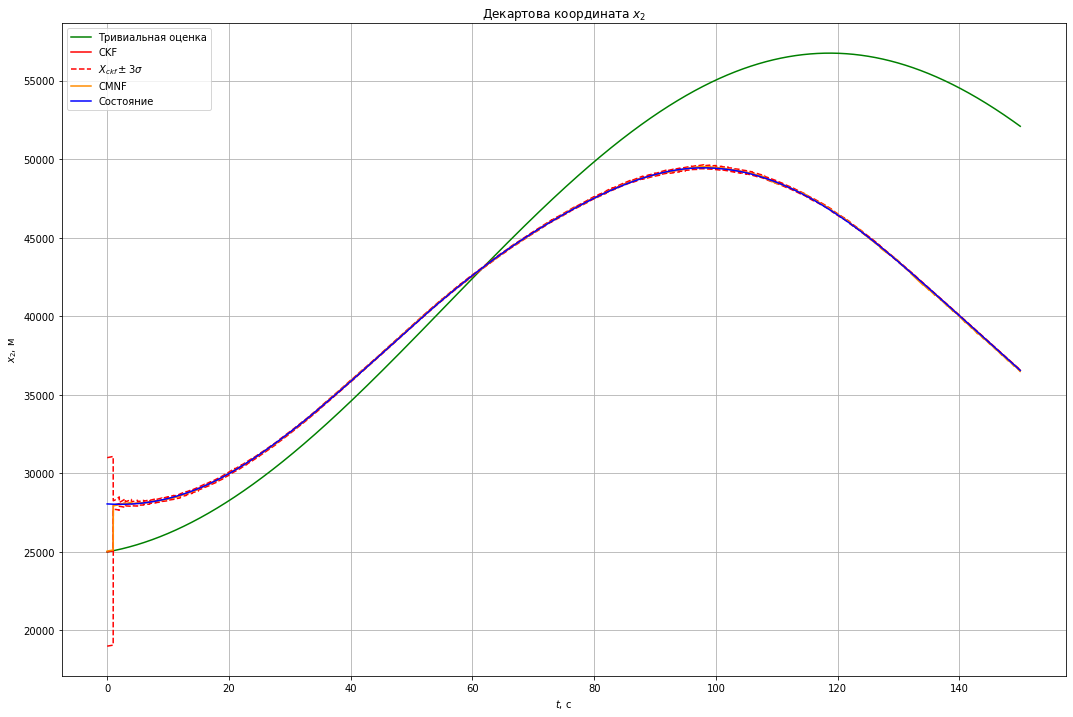

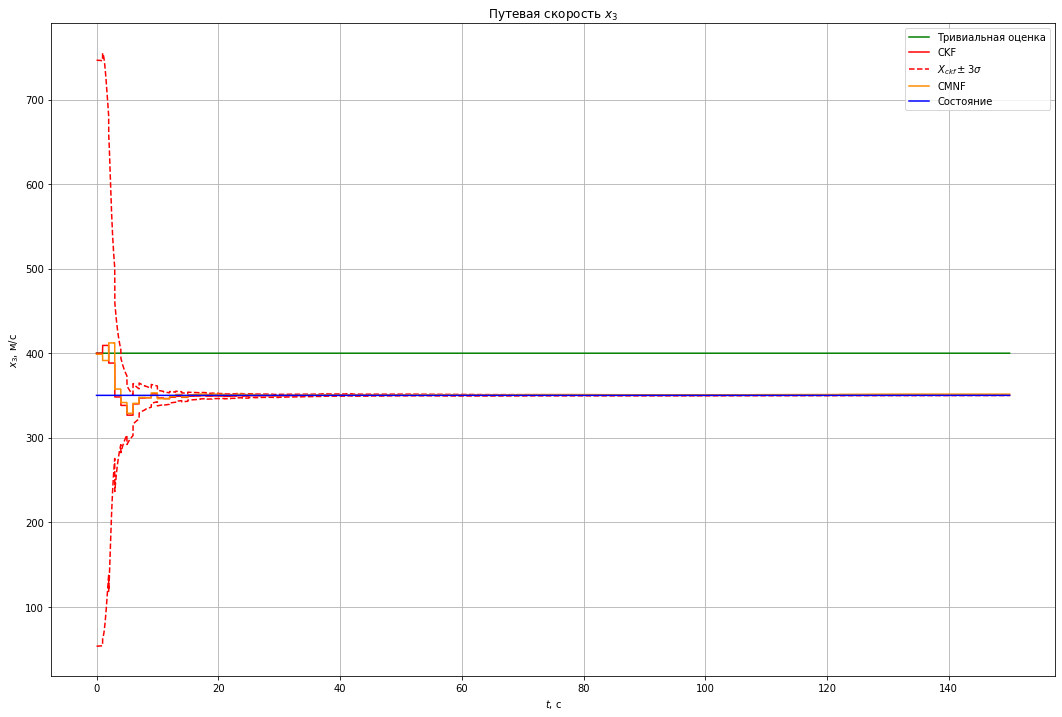

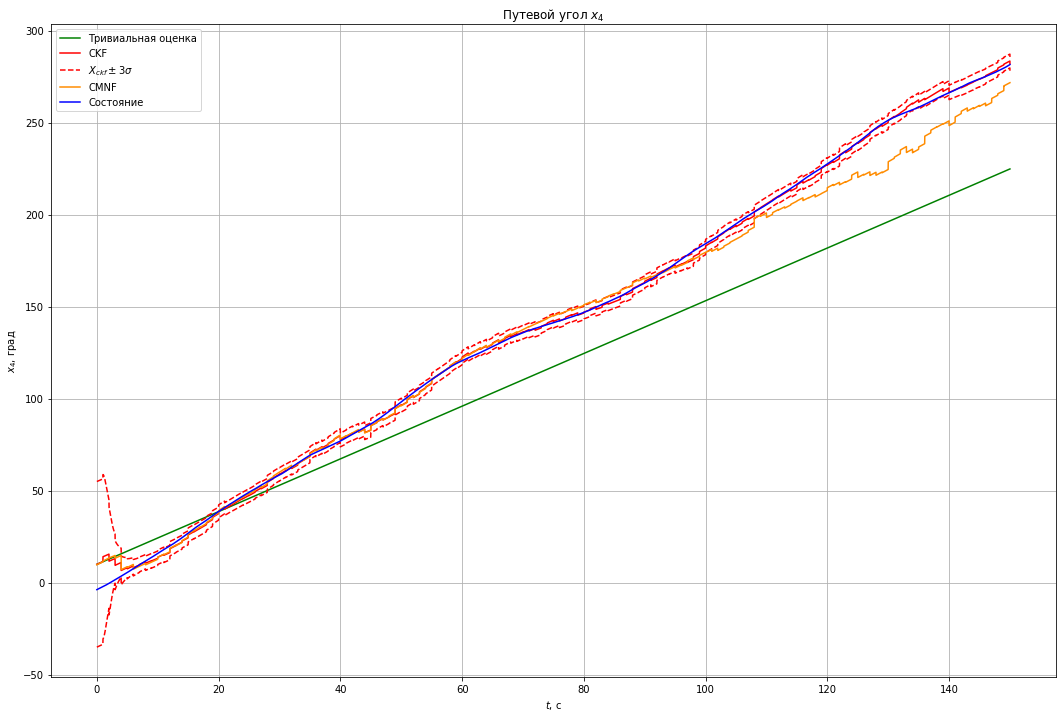

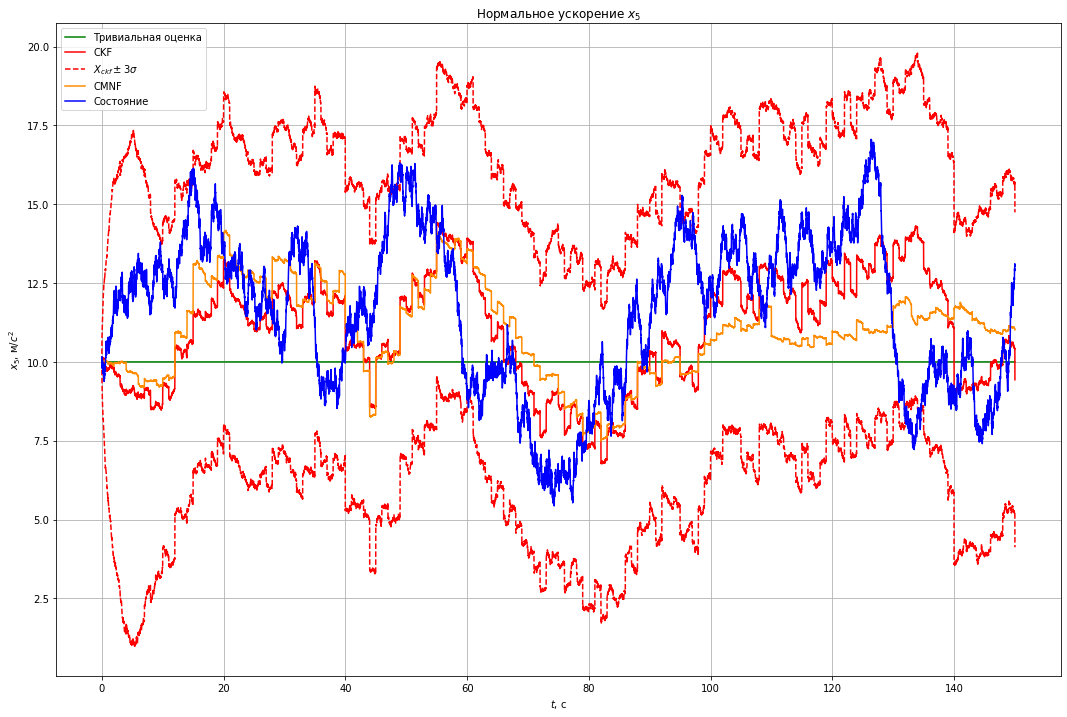

In [49]:
for i in range(n):
    plot_state(i)

## Характеристики точности оценивания координат

Вычислим характеристики точности оценивания путём осреднения пучка из $100$ траекторий.

In [174]:
n_simulations = 100 # число траекторий
np.random.seed(123)
sim_state, sim_obs = [], []
for i in range(n_simulations):
    s, o = gen_sys()
    sim_state.append(s)
    sim_obs.append(o)
sim_state = np.stack(sim_state)
sim_obs = np.stack(sim_obs)
np.save('sim_state.npy', sim_state)
np.save('sim_obs.npy', sim_obs)

In [23]:
sim_state = np.load('sim_state.npy', allow_pickle=True)
sim_obs = np.load('sim_obs.npy', allow_pickle=True)

In [30]:
cmnf_est = []
for i in range(n_simulations):
    est, cov = run_cmnf(np.array(sim_obs[i]), N, n, state_time, obs_time)
    cmnf_est.append(est)
cmnf_est = np.stack(cmnf_est)
np.save('cmnf_est.npy', cmnf_est)

In [41]:
ckf_est = []
for i in range(n_simulations):
    est, cov = run_ckf(np.array(sim_obs[i]), state_time, obs_time)
    ckf_est.append(est)
ckf_est = np.stack(ckf_est)
np.save('ckf_est.npy', ckf_est)

In [42]:
cmnf_est = np.load('cmnf_est.npy', allow_pickle=True)
ckf_est = np.load('ckf_est.npy', allow_pickle=True)

In [43]:
comp_rmse = np.std(np.array(sim_state, dtype = np.float64), axis = 0)
ckf_rmse = np.std(np.array(sim_state - ckf_est, dtype = np.float64), axis = 0)
cmnf_rmse = np.std(np.array(sim_state - cmnf_est, dtype = np.float64), axis = 0)

In [50]:
def plot_rmse(i):
    plt.figure(figsize=[18,12])
    plt.plot(state_time, comp_rmse[:,i], label = 'СКО компоненты', color = 'blue')
    plt.plot(state_time, ckf_rmse[:,i], label = 'СКО ошибки оценки CKF', color = 'red')
    plt.plot(state_time, cmnf_rmse[:,i], label = 'СКО ошибки оценки CMNF', color = 'orange')
    plt.grid(True)
    plt.title(plot_names[i])
    plt.xlabel('$t$, c')
    plt.ylabel(y_labels[i])
    plt.legend()
    plt.show()

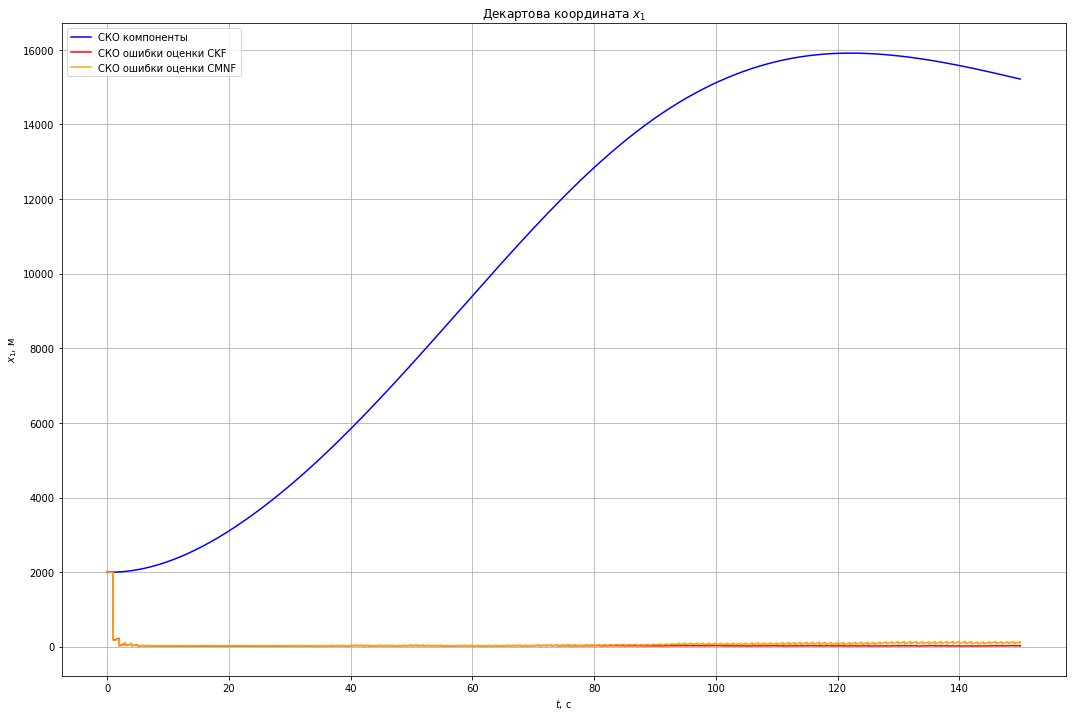

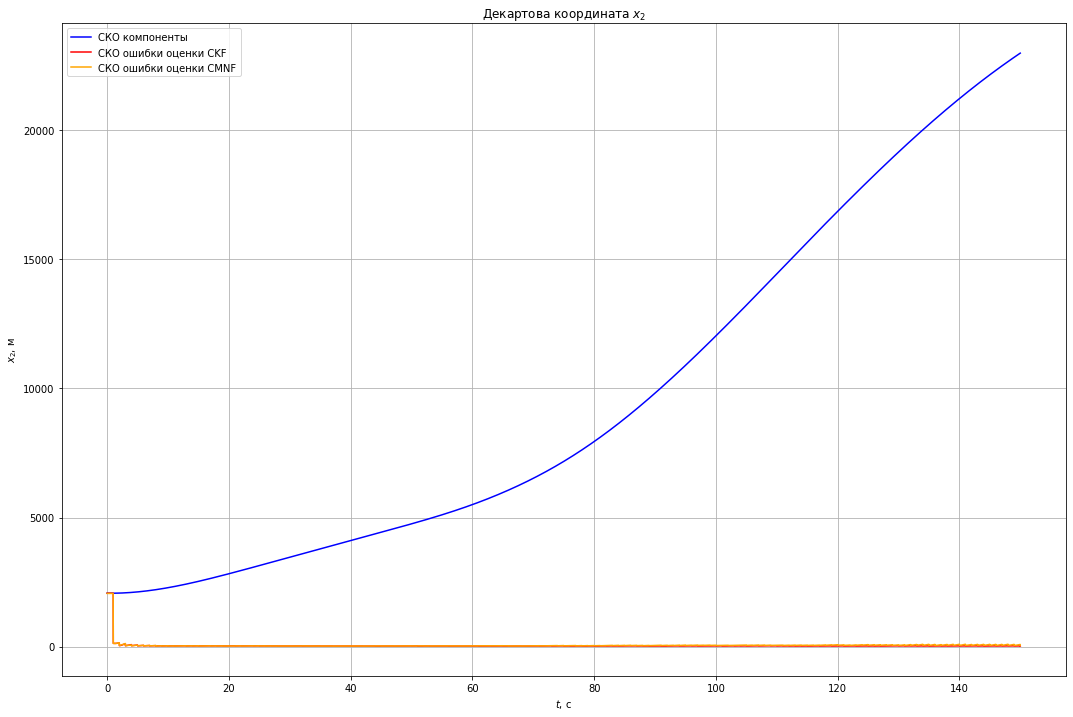

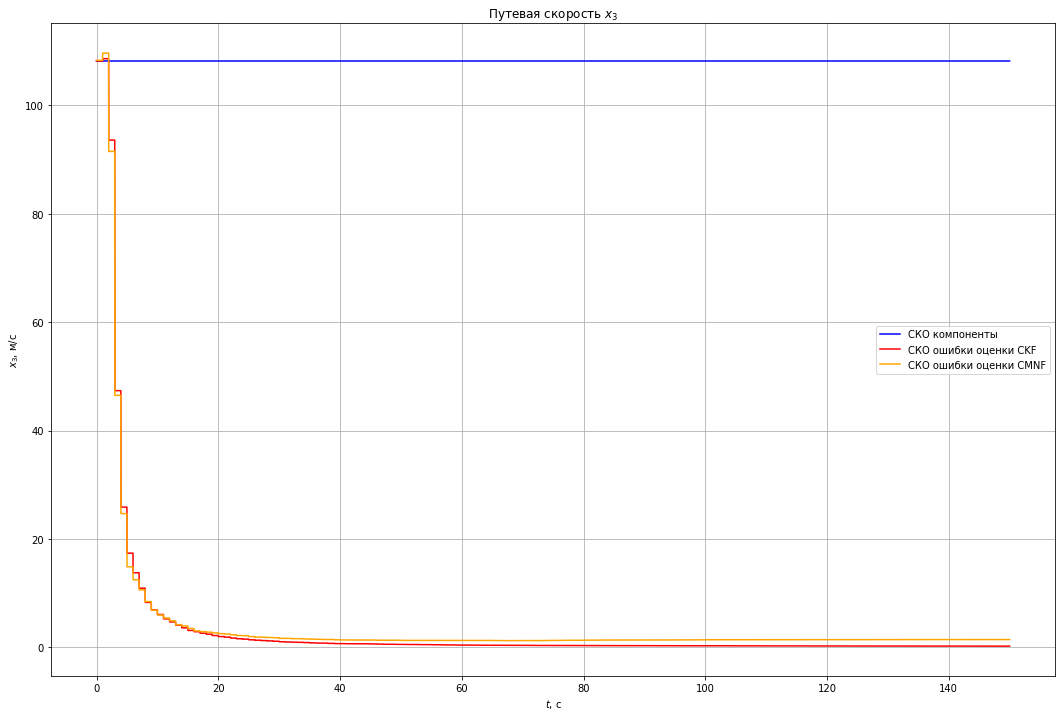

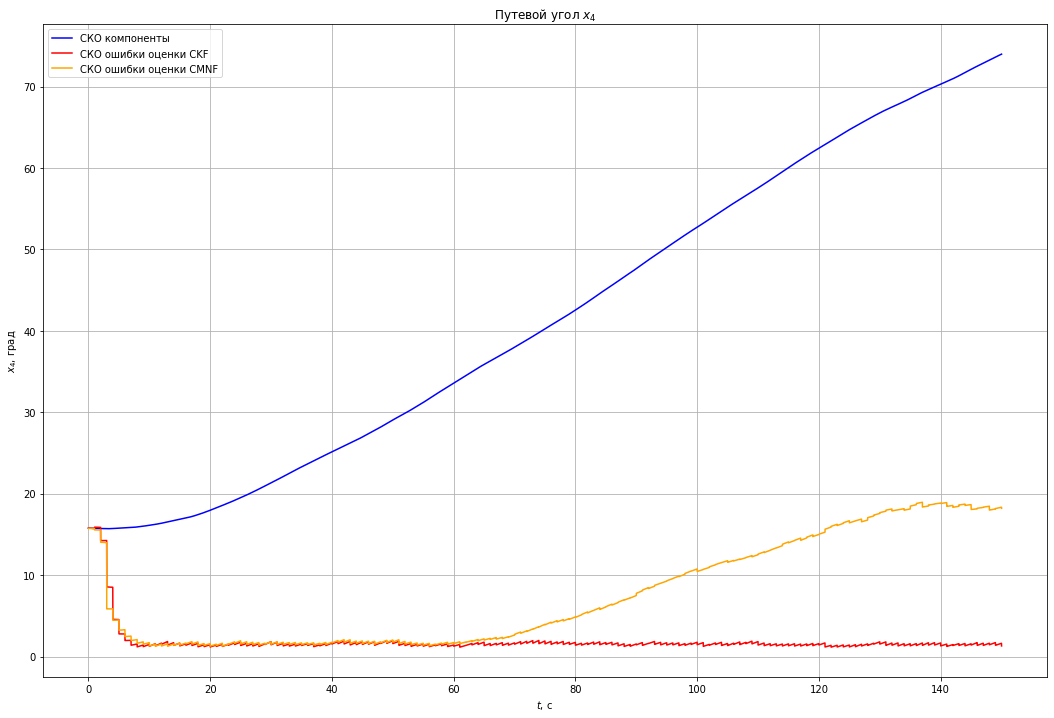

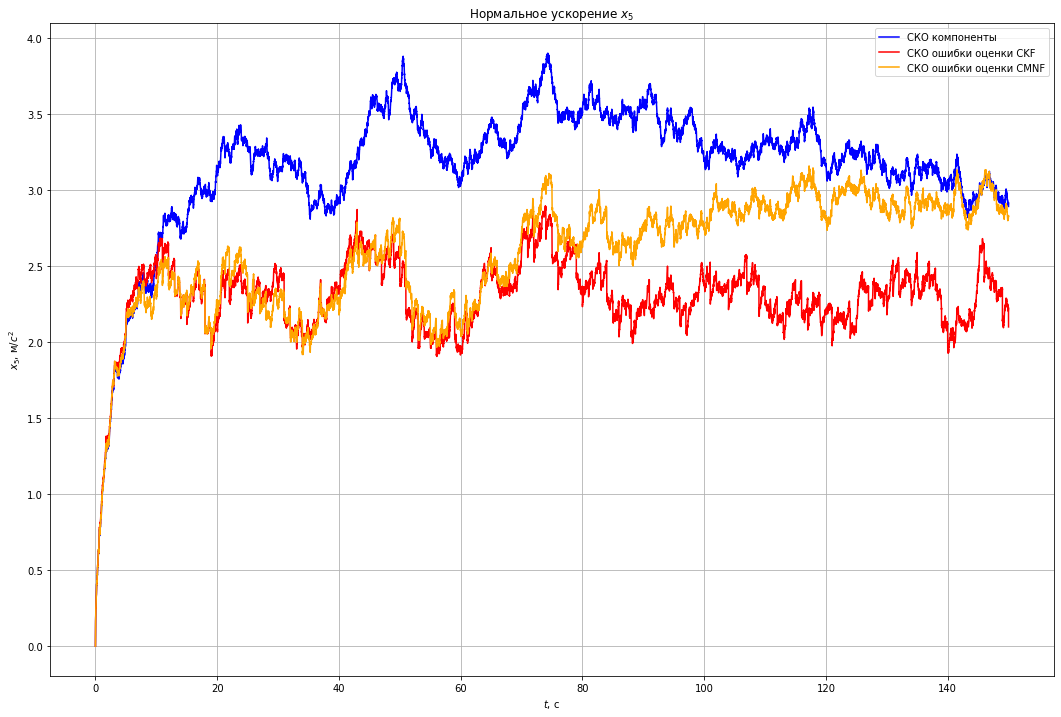

In [51]:
for i in range(n):
    plot_rmse(i)

## Выводы на основе численных экспериментов
Оба фильтра очень точно оценивают декартовы координаты цели и её скорость, однако при оценивании путевого угла и нормального ускорения, начиная с некоторого момента, точность CMNF значительно снижается. CKF оценивает все координаты достаточно точно, о чем свидетельствует малая ширина "коридора" $\pm 3\sigma$.